# **Proyecto final Inteligencia Artificial**
***Saray Andrea Isaza Vides***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# regresión Lógistica

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

#SVM
from sklearn import svm


In [3]:
dataframe = pd.read_csv(r"proyecto.csv",sep=';')
dataframe.head(-2)
dataframe.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.048919,0.181162,0.062798,16.269190
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.038803,0.027414,0.007060,4.833242
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960,7.930000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.020310,0.161900,0.057700,13.010000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.033500,0.179200,0.061540,14.970000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.074000,0.195700,0.066120,18.790000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.201200,0.304000,0.097440,36.040000


In [4]:
# number of rows and columns in the dataset
dataframe.shape

(569, 12)

In [5]:
print(dataframe.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


**Conjunto de etiquetas y características**

In [6]:

X = dataframe[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_worst']].values
y = dataframe['diagnosis'].values

**Partición de datos para validación y entrenamiento**

In [7]:
#partición del conjunto de muestras en validación y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=0)
print(X_train.shape)
print(X_test.shape)
scaler = StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!
scaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(398, 10)
(171, 10)


**Regresión logística**

In [10]:
#OVR
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library


ACC_RL=[]
MCC_RL=[]
TPR_RL=[]

# clasificador de tipo clase, multiclase de tipo OVR con un maximo de iteraciones 100
metrica = LogisticRegression(penalty='l2',max_iter=1000, C=1000,random_state=0)
metrica.fit(X_train, y_train)
y_predicted=metrica.predict(X_test)
y_score=metrica.predict_proba(X_test)


#Hallar: Accuracy
ACC_RL.append(metrica.score(X_test, y_test))
print("ACC_RL = ",ACC_RL)
#MCC 
MCC_RL.append(matthews_corrcoef(y_test,y_predicted))
print("MCC_RL = ",MCC_RL)
#f1_score
modelo=f1_score(y_test, y_predicted, average='micro')
print("f1_score_RL = ",modelo)


ACC_RL =  [0.9707602339181286]
MCC_RL =  [0.9374499319073584]
f1_score_RL =  0.9707602339181286


**Evaluación del modelo**

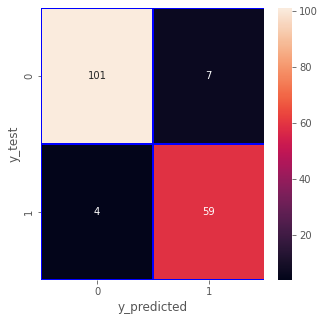

In [40]:
cm = confusion_matrix(y_test, y_predicted)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_test")
plt.show()

In [55]:
model_evento = pd.DataFrame({'Model: Regresión logística': ['ACC_RL','MCC_RL','f1_score_RL'], 
                         'Accuracy': [ACC_RL,MCC_RL,modelo]})
model_evento

,Model: Regresión logística,Accuracy
0,ACC_RL,[0.9707602339181286]
1,MCC_RL,[0.9374499319073584]
2,f1_score_RL,0.97076


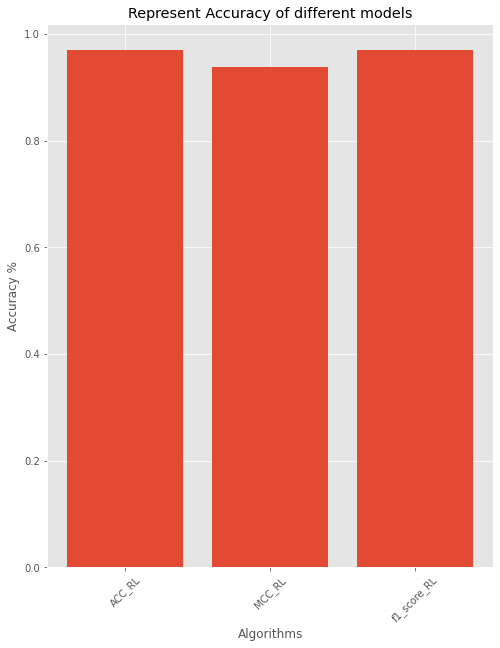

In [56]:
plt.figure(figsize=(8,10))
plt.title("Represent Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=45)
plt.bar(model_evento['Model: Regresión logística'],model_evento['Accuracy'])
plt.show()

**Clasificador KNN**

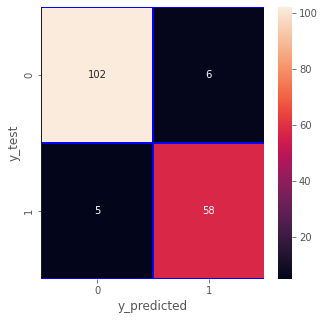

In [15]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import f1_score

k_range = range(1, int(np.sqrt(len(y_train))))
distance='minkowski'#podemos hacer un for que recorra las distancias que queremos probar en un enfoque grid-search.

ACC_KNN=[]
MCC_KNN=[]
TPR_KNN=[]




for k in k_range:#por ahora variemos K, 
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance',metric=distance, metric_params=None,algorithm='brute')
    #knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_predicted=knn.predict(X_test)
    y_score=knn.predict_proba(X_test)
    #Hallar: Accuracy
    ACC_KNN.append(knn.score(X_test, y_test))
    #MCC 
    MCC_KNN.append(matthews_corrcoef(y_test,y_predicted))
    #f1
    #f1_score(y_test, y_predicted, average='micro')
    TPR_KNN.append(recall_score(y_test,y_predicted, average='macro'))

cm = confusion_matrix(y_test, y_predicted)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_test")
plt.show()
    
   
    

**ACC**

[0.935672514619883, 0.935672514619883, 0.9239766081871345, 0.935672514619883, 0.935672514619883, 0.9415204678362573, 0.9239766081871345, 0.9415204678362573, 0.9473684210526315, 0.9473684210526315, 0.9415204678362573, 0.9415204678362573, 0.9298245614035088, 0.9181286549707602, 0.9239766081871345, 0.9239766081871345, 0.9298245614035088, 0.935672514619883]


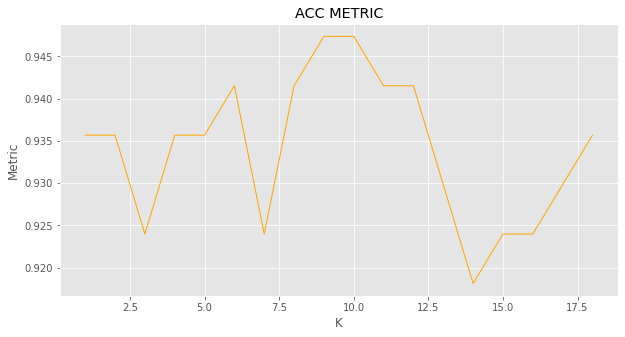

In [16]:
print(ACC_KNN)
plt.figure()
plt.plot(k_range, ACC_KNN, color='orange',lw=1)
plt.xlabel('K')
plt.ylabel('Metric')
plt.title('ACC METRIC')
plt.show()




**MCC**

[0.8637322871646091, 0.8637322871646091, 0.83882953533437, 0.8622957179569795, 0.8622957179569795, 0.8754371556885308, 0.840905131872397, 0.8754371556885308, 0.8865999974723524, 0.8873471226071058, 0.8754371556885308, 0.8754371556885308, 0.8492063492063492, 0.8254872879465426, 0.8372443133068531, 0.83882953533437, 0.8504622218175367, 0.8622957179569795]


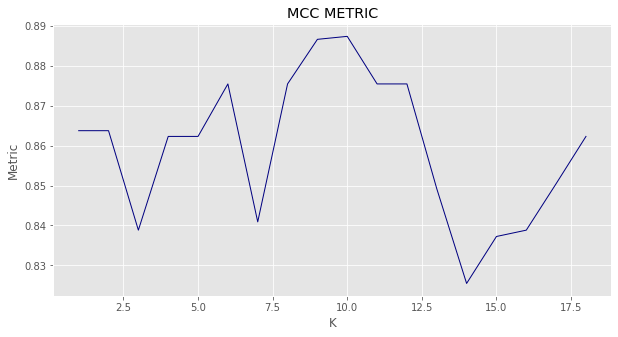

In [17]:
print(MCC_KNN)
plt.figure()
plt.plot(k_range, MCC_KNN, color='navy',lw=1)
plt.xlabel('K')
plt.ylabel('Metric')
plt.title('MCC METRIC')
plt.show()

**TPR**

[0.9358465608465609, 0.9358465608465609, 0.9232804232804233, 0.9325396825396826, 0.9325396825396826, 0.9404761904761905, 0.9265873015873016, 0.9404761904761905, 0.9417989417989417, 0.9451058201058201, 0.9404761904761905, 0.9404761904761905, 0.9246031746031746, 0.9153439153439153, 0.919973544973545, 0.9232804232804233, 0.9279100529100529, 0.9325396825396826]


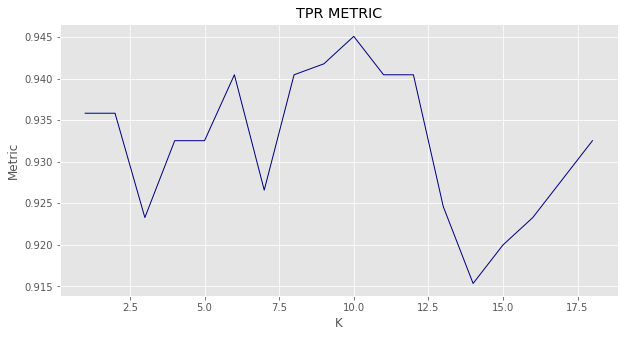

In [18]:
print(TPR_KNN)
plt.figure()
plt.plot(k_range, TPR_KNN, color='navy',lw=1)
plt.xlabel('K')
plt.ylabel('Metric')
plt.title('TPR METRIC')
plt.show()

**Evaluación de modelo KNN**

In [50]:
model_evnto = pd.DataFrame({'1': ['ACC_KNN','MCC_KNN','TPR_KNN'], 
                         'Accuracy': [ACC_KNN,MCC_KNN,TPR_KNN]})
model_evnto

,1,Accuracy
0,ACC_KNN,"[0.935672514619883, 0.935672514619883, 0.92397..."
1,MCC_KNN,"[0.8637322871646091, 0.8637322871646091, 0.838..."
2,TPR_KNN,"[0.9358465608465609, 0.9358465608465609, 0.923..."


**SVM**

MCC 0.8994708994708994
ACC 0.9532163742690059
TPR [0.9497354497354498]
f1_score 0.9532163742690059


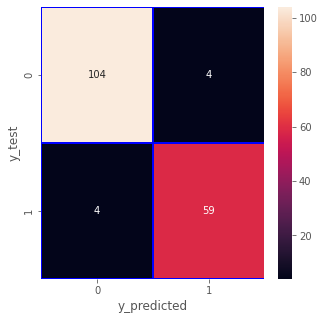

In [30]:
#LINEAL
kernels=['linear', 'poly', 'rbf']
#lineal
Kernel=0
msv = svm.SVC(kernel=kernels[Kernel],gamma=0.01)
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

ACC_SVM_L=[]
MCC_SVM_L=[]
TPR_SVM_L=[]

msv.fit(X_train, y_train)

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import f1_score

y_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC_SVM_L = matthews_corrcoef(y_test, y_predicted)
print("MCC", MCC_SVM_L)
ACC_SVM_L = accuracy_score(y_test, y_predicted)
print("ACC", ACC_SVM_L)
TPR_SVM_L.append(recall_score(y_test,y_predicted, average='macro'))
print("TPR", TPR_SVM_L)
#f1_sc2ore
f1_score_SVM_L=f1_score(y_test, y_predicted, average='micro')
print("f1_score",f1_score_SVM_L)

cm = confusion_matrix(y_test, y_predicted)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_test")
plt.show()

**Evaluación de modelo SVM lineal**

In [52]:
model_evento = pd.DataFrame({'Model: SVM lineal': ['ACC_SVM_L','MCC_SVM_L','TPR_SVM_L','f1_score_SVM_L'], 
                         'Accuracy': [ACC_SVM_L,MCC_SVM_L,TPR_SVM_L,f1_score_SVM_L]})
model_evento

,Model: SVM lineal,Accuracy
0,ACC_SVM_L,0.953216
1,MCC_SVM_L,0.899471
2,TPR_SVM_L,[0.9497354497354498]
3,f1_score_SVM_L,0.953216


**SVM Polinomial**

MCC []
ACC []
TPR [0.9451058201058201]
f1_score 0.9473684210526315


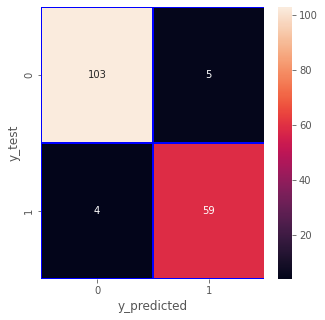

In [33]:
kernels=['linear', 'poly', 'rbf']

#polinomial cuadrático
Kernel=1
msv = svm.SVC(kernel=kernels[Kernel],degree=4,coef0=1)

ACC_SVM_P=[]
MCC_SVM_P=[]
TPR_SVM_P=[]

#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

msv.fit(X_train, y_train)

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score

y_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_predicted)
print("MCC", MCC_SVM_P)
ACC = accuracy_score(y_test, y_predicted)
print("ACC", ACC_SVM_P)
TPR_SVM_P.append(recall_score(y_test,y_predicted, average='macro'))
print("TPR", TPR_SVM_P)
#f1_sc2ore
f1_score_SVM_P=f1_score(y_test, y_predicted, average='micro')
print("f1_score",f1_score_SVM_P)


cm = confusion_matrix(y_test, y_predicted)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_test")
plt.show()


**Evaluación de modelo**

In [51]:
model_evento = pd.DataFrame({'Model: SVM polinomial': ['ACC_SVM_P','MCC_SVM_P','TPR_SVM_P','f1_score_SVM_P'], 
                         'Accuracy': [ACC_SVM_P,MCC_SVM_P,TPR_SVM_P,f1_score_SVM_P]})
model_evento

,Model: SVM polinomial,Accuracy
0,ACC_SVM_P,[]
1,MCC_SVM_P,[]
2,TPR_SVM_P,[0.9451058201058201]
3,f1_score_SVM_P,0.947368


**RBF**

matthews_corrcoef 0.8637322871646091
Accuracy 0.935672514619883
TPR [0.9358465608465609]
f1_score 0.935672514619883


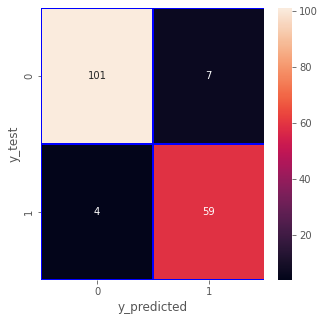

In [35]:
kernels=['linear', 'poly', 'rbf']
#rbf 
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel],gamma=1)#cambiar el valor de gamma
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
msv.fit(X_train, y_train)
ACC_SVM_R=[]
MCC_SVM_R=[]
TPR_SVM_R=[]

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import f1_score

y_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC_SVM_R = matthews_corrcoef(y_test, y_predicted)
print("matthews_corrcoef", MCC_SVM_R)
ACC_SVM_R = accuracy_score(y_test, y_predicted)
print("Accuracy", ACC_SVM_R)
TPR_SVM_R.append(recall_score(y_test,y_predicted, average='macro'))
print("TPR", TPR_SVM_R)
#f1_sc2ore
f1_score_SVM_R=f1_score(y_test, y_predicted, average='micro')
print("f1_score",f1_score_SVM_R)

cm = confusion_matrix(y_test, y_predicted)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_test")
plt.show()

**Evalución del modelo SVR rbf**

In [53]:
model_evento = pd.DataFrame({'Model: SVM rbf': ['ACC_SVM_R','MCC_SVM_R','TPR_SVM_R','f1_score_SVM_R'], 
                         'Accuracy': [ACC_SVM_R,MCC_SVM_R,TPR_SVM_R,f1_score_SVM_R]})
model_evento

,Model: SVM rbf,Accuracy
0,ACC_SVM_R,0.935673
1,MCC_SVM_R,0.863732
2,TPR_SVM_R,[0.9358465608465609]
3,f1_score_SVM_R,0.935673


**Evaluación de general de los modelos**

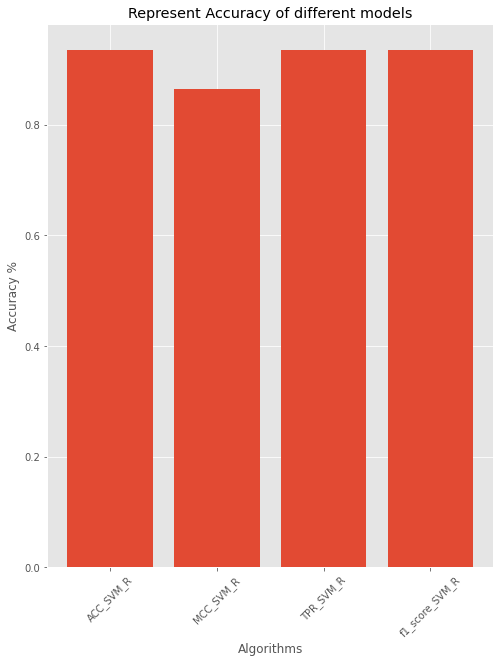

In [48]:
plt.figure(figsize=(8,10))
plt.title("Represent Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=45)
plt.bar(model_evento['Model: 1'],model_evento['Accuracy'])
plt.show()